# Dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,balanced_accuracy_score

# Functions

In [2]:
# Function to find the best regressor for a single descriptor linear regression model
def find_best_regressor(data_set_in,y_desc,N,desc_drop):
    
    # linear regression model
    regr = LinearRegression()

    desc_score = []

    data_set = data_set_in.select_dtypes('number').drop(desc_drop,axis=1)
    
    for descriptor in data_set.columns:
        regr.fit(data_set_in[descriptor].array.reshape(-1, 1),data_set_in[y_desc])
        desc_score.append(r2_score(data_set_in[y_desc],regr.predict(data_set_in[descriptor].array.reshape(-1, 1))))
    
    out_array = pd.DataFrame()
    out_array['Descriptor'] = data_set.columns[np.argsort(desc_score)[::-1][:N]]
    out_array['r2'] = np.array(desc_score)[np.argsort(desc_score)[::-1][:N]]
    print(out_array)
    
    return data_set.columns[np.argmax(desc_score)],out_array

# function to find the best descriptor for a 1-feature logistic regression fit
# N defines number of top ranked descriptors in output
def find_best_classifier(data_set_in,y_desc,N,desc_drop):
    
    # select numerical values (descriptors)
    data_set = data_set_in.select_dtypes('number').drop(desc_drop,axis=1)

    # logistic regression model
    clf = LogisticRegression()

    # matrix for scores
    desc_score = []

    # finds logistic regression fit for each descriptor
    for descriptor in data_set.columns:
        clf.fit(data_set_in[descriptor].array.reshape(-1, 1),data_set_in[y_desc])
        desc_score.append(balanced_accuracy_score(data_set_in[y_desc],clf.predict(data_set_in[descriptor].array.reshape(-1, 1))))
    
    # assign output array of best desecriptors to print
    out_array = pd.DataFrame()
    out_array['Descriptor'] = data_set.columns[np.argsort(desc_score)[:-(N+1):-1]]
    out_array['Balanced accuracy'] = np.array(desc_score)[np.argsort(desc_score)[:-(N+1):-1]]
    print(out_array)
    
    # returns best descriptor, list of descriptors and list of scores
    return data_set.columns[np.argmax(desc_score)],data_set.columns,desc_score

# Data import

In [3]:
# Reading descriptors for filtered molecules from DrugBank
db_molecules = pd.read_csv('Data_files/descriptors_db_filt.csv',low_memory=False)
db_molecules

,SMILES,CASRN,NAME,drugbank_id,ERROR,MW,AMW,Sv,Se,Sp,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
0,CC(C)NCCCC1(C(N)=O)C2=CC=CC=C2C3=CC=CC=C13,-,INDECAINIDE,DB00192,-,308.5,6.563,28.55,46.25,30.84,...,0,0,0,0,0,0,0,0,0,0
1,C12CC(OC(=O)C3=CC(OC)=C(OC)C(OC)=C3)C(OC)C(C(=...,50-55-5,reserpine,DB00206,-,608.8,7.247,51.49,84.94,53.57,...,0,6,8.667,6.667,34.17,0.7765,9,0.2045,30,8.249
2,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,83905-01-5,Azithromycin,DB00207,-,749.1,6.041,67.06,124.1,72.11,...,0,0,0,0,48.08,0.9247,13.03,0.2505,58.19,15.96
3,ClC1=CC=CC=C1CN2CCC3=C(C2)C=CS3,55142-85-3,Ticlopidine,DB00208,-,263.8,8.51,20.72,30.69,22.84,...,0,0,0,0,0,0,0,0,0,0
4,CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C3=CC=C(F)C=C3,59729-33-8,Citalopram,DB00215,-,324.4,7.21,28.41,44.88,30.02,...,0,0,6,6,15,0.625,1,0.04167,9.11,1.732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,COCCC(=O)NC1CCC(CCN2CCN(CC2)C3=CC=CC(=C3)C#N)CC1,-,BP-14979,DB16302,-,398.6,6.327,36.42,62.32,39.35,...,0,0,0,0,0,0,0,0,0,0
1582,CC1N(CCC2=C1C=CC=C2)C3=NC(NC4=CC=C(F)C=C4)=NC(...,-,Revaprazan,DB16308,-,362.5,7.25,31.74,49.76,33.57,...,0,0,6,12,25,0.9259,4,0.1481,29.43,6.928
1583,COC(=O)C(N1CCC2=C(C1)C=C(OC(C)=O)S2)C3=C(Cl)C=...,-,Vicagrel,DB16349,-,379.9,8.835,28.64,43.76,30.18,...,0,0,6,5,20,0.8,3,0.12,18.97,5.196
1584,COC1=C(OC)C(=CC=C1)C(O)C2CCN(CCC3=CC=C(F)C=C3)CC2,-,Volinanserin,DB16351,-,373.5,6.791,32.92,54.97,34.97,...,0,0,6,6,25,0.9259,3,0.1111,25.06,2.828


In [4]:
# Reading IDNP characterization data
IDNP_char = pd.read_csv('Data_files/idnp_encaps_size.csv')
IDNP_char

,Name,Encapsulation,Size
0,Amiodarone,67.5,169.200
1,Apilimod,0.0,245.325
2,Siramesine,87.3,109.900
3,Tamoxifen,67.5,224.750
4,Bedaquiline,41.7,253.800
5,Ceritinib; 1032900-25-6,42.1,179.350
6,Bazedoxifene,29.1,229.550
7,Nilotinib,55.2,890.900
8,Toremifene,79.6,222.950
9,Elbasvir; 1370468-36-2,28.5,4801.750


In [5]:
# Extracting descriptors for tested molecules and adding measured values for combined DataFrame
IDNP_data = db_molecules[db_molecules['NAME'].isin(IDNP_char['Name'])]
IDNP_data = IDNP_data.set_index('NAME')
for names in IDNP_char['Name']:
    IDNP_data.loc[names,'Encapsulation']=IDNP_char[IDNP_char['Name']==names]['Encapsulation'].values[0]
    IDNP_data.loc[names,'Size']=IDNP_char[IDNP_char['Name']==names]['Size'].values[0]

# drop extra columns
IDNP_data=IDNP_data.drop(['CASRN','ERROR'],axis=1)
IDNP_data

/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


,SMILES,drugbank_id,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment,Encapsulation,Size
NAME,,,,,,,,,,,,,,,,,,,,,
Raloxifene,OC1=CC=C(C=C1)C2=C(C(=O)C3=CC=C(OCCN4CCCCC4)C=...,DB00481,473.6,7.764,39.92,60.97,42.37,67.65,0.6544,0.9996,...,0,0,0,0,0,0,0,0,48.1,668.350
Toremifene,CN(C)CCOC1=CC=C(C=C1)C(=C(CCCl)C2=CC=CC=C2)C3=...,DB00539,406,7.123,35.94,56.12,38.98,63.46,0.6305,0.9846,...,0,0,0,0,0,0,0,0,79.6,222.950
Tamoxifen,CCC(=C(C1=CC=CC=C1)C2=CC=C(C=C2)OCCN(C)C)C3=CC...,DB00675,371.6,6.519,35.11,55.8,38.12,63.52,0.616,0.9789,...,0,0,0,0,0,0,0,0,67.5,224.750
Thioridazine,CSC1=CC2=C(SC3=CC=CC=C3N2CCC4CCCCN4C)C=C1,DB00679,370.6,7.267,31.74,49.96,35.44,56.82,0.6223,0.9796,...,0,12,21.5,0.86,2,0.08,28.18,2,2.5,131.300
Clomifene,CCN(CC)CCOC1=CC=C(C=C1)C(=C(Cl)C2=CC=CC=C2)C3=...,DB00882,406,7.123,35.94,56.12,38.98,63.46,0.6305,0.9846,...,0,0,0,0,0,0,0,0,73.8,254.800
Amiodarone,CCCCC1=C(C(=O)C2=CC(I)=C(OCCN(CC)CC)C(I)=C2)C3...,DB01118,645.3,10.76,38.7,59.48,44.11,66.8,0.645,0.9913,...,0,0,0,0,0,0,0,0,67.5,169.200
Carvedilol,COC1=CC=CC=C1OCCNCC(O)COC2=CC=CC3=C2C4=CC=CC=C4N3,DB01136,406.5,7.259,35.22,56.12,36.97,62.82,0.629,1.002,...,6,15,28,0.9333,5,0.1667,27.18,4.472,0.9,146.550
Sertaconazole,ClC1=CC(Cl)=C(C=C1)C(CN2C=CN=C2)OCC3=CSC4=C3C=...,DB01153,437.8,10.42,30.64,42.65,32.78,46.28,0.7296,1.015,...,6,10,20,0.7407,1,0.03704,17.32,3.317,48.9,333.550
Doramapimod,CC1=CC=C(C=C1)N2N=C(C=C2NC(=O)NC3=CC=C(OCCN4CC...,DB03044,527.7,6.944,46.68,75.63,49.57,85.76,0.6142,0.9951,...,0,0,0,0,0,0,0,0,18.0,463.850


In [6]:
# Make sure all descriptor and data columns are numeric
for col in IDNP_data.iloc[:,2:].columns:
    IDNP_data[col] = pd.to_numeric(IDNP_data[col])

In [7]:
# Output IDNP data for plotting
IDNP_data.to_csv('Data_files/For_plotting/IDNP_data.csv')

# Regression analysis - Encapsulation

## Step 1

In [8]:
# Find best regressor for all IDNP formulations to describe encapsulation efficiency
to_ignore = ['Size','Encapsulation']
[best_regressor1, scores_1] = find_best_regressor(IDNP_data,'Encapsulation',20,to_ignore)
scores_1.to_csv('Data_files/For_plotting/IDNP_regr_scores_1.csv')

      Descriptor        r2
0         MLOGP2  0.341481
1         CMC-80  0.334586
2       LOGPcons  0.329116
3         DLS_01  0.280354
4           rGes  0.273503
5         LOGP99  0.268637
6        MDEC-22  0.258384
7          MLOGP  0.247528
8         BLTA96  0.247507
9         BLTF96  0.247472
10        BLTD48  0.247472
11        DLS_03  0.245180
12         ALOGP  0.243334
13  Psychotic-80  0.234078
14  Infective-80  0.234078
15          CIC3  0.234023
16        GATS3i  0.223319
17          SIC3  0.222811
18  CATS2D_04_LL  0.217949
19          BIC3  0.215498


In [9]:
# All IDNPs with CMC-80 = 1 have low encapsualtion
IDNP_data[IDNP_data['CMC-80']==1]

,SMILES,drugbank_id,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment,Encapsulation,Size
NAME,,,,,,,,,,,,,,,,,,,,,
Thioridazine,CSC1=CC2=C(SC3=CC=CC=C3N2CCC4CCCCN4C)C=C1,DB00679,370.6,7.267,31.74,49.96,35.44,56.82,0.6223,0.9796,...,0.0,12.0,21.5,0.8600,2.0,0.0800,28.18,2.000,2.5,131.300
Carvedilol,COC1=CC=CC=C1OCCNCC(O)COC2=CC=CC3=C2C4=CC=CC=C4N3,DB01136,406.5,7.259,35.22,56.12,36.97,62.82,0.6290,1.0020,...,6.0,15.0,28.0,0.9333,5.0,0.1667,27.18,4.472,0.9,146.550
Cediranib,COC1=CC2=C(C=C1OCCCN3CCCC3)N=CN=C2OC4=C(F)C5=C...,DB04849,450.6,7.509,37.93,60.51,39.46,67.94,0.6323,1.0080,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,15.5,888.150
Apilimod,CC1=CC=CC(C=NNC2=CC(=NC(OCCC3=CC=CC=N3)=N2)N4C...,DB05611,418.5,7.343,35.83,57.10,37.56,64.56,0.6285,1.0020,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,0.0,245.325
Varlitinib,CC1COC(NC2=CC=C3N=CN=C(NC4=CC=C(OCC5=NC=CS5)C(...,DB05944,467.0,9.157,35.26,51.85,36.78,57.18,0.6914,1.0170,...,0.0,22.0,30.0,0.9375,8.0,0.2500,46.85,11.660,13.8,3881.000
Axitinib,CNC(=O)C1=C(SC2=CC=C3C(NN=C3C=CC4=CC=CC=N4)=C2...,DB06626,386.5,8.402,31.68,46.00,33.45,51.03,0.6886,0.9999,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,10.5,217.875
Mardepodect,CN1C=C(C(=N1)C2=CC=C(OCC3=NC4=CC=CC=C4C=C3)C=C...,DB08387,392.5,7.850,34.01,49.80,35.57,55.52,0.6803,0.9961,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,14.8,264.650
Dapivirine,CC1=CC(C)=C(NC2=NC(NC3=CC=C(C=C3)C#N)=NC=C2)C(...,DB08639,329.4,7.487,28.79,43.69,30.36,49.40,0.6544,0.9930,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,17.3,353.350
ASP-4058,CC(OC1=CC=C(C=C1C(F)(F)F)C2=NC(=NO2)C3=CC=C4NC...,DB11819,442.4,10.290,30.50,46.32,28.89,50.36,0.7094,1.0770,...,0.0,21.0,29.0,0.9355,6.0,0.1936,40.84,10.390,23.6,74200.000


In [10]:
# Simplified methdod using just ALOGP and AMR also filters out low encapsulation IDNPs (one extra drug)
IDNP_data[(IDNP_data['ALOGP']<5.6)&(IDNP_data['AMR']<130)]

,SMILES,drugbank_id,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment,Encapsulation,Size
NAME,,,,,,,,,,,,,,,,,,,,,
Thioridazine,CSC1=CC2=C(SC3=CC=CC=C3N2CCC4CCCCN4C)C=C1,DB00679,370.6,7.267,31.74,49.96,35.44,56.82,0.6223,0.9796,...,0.0,12.0,21.5,0.8600,2.0,0.0800,28.18,2.000,2.5,131.300
Carvedilol,COC1=CC=CC=C1OCCNCC(O)COC2=CC=CC3=C2C4=CC=CC=C4N3,DB01136,406.5,7.259,35.22,56.12,36.97,62.82,0.6290,1.0020,...,6.0,15.0,28.0,0.9333,5.0,0.1667,27.18,4.472,0.9,146.550
Cediranib,COC1=CC2=C(C=C1OCCCN3CCCC3)N=CN=C2OC4=C(F)C5=C...,DB04849,450.6,7.509,37.93,60.51,39.46,67.94,0.6323,1.0080,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,15.5,888.150
Apilimod,CC1=CC=CC(C=NNC2=CC(=NC(OCCC3=CC=CC=N3)=N2)N4C...,DB05611,418.5,7.343,35.83,57.10,37.56,64.56,0.6285,1.0020,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,0.0,245.325
Varlitinib,CC1COC(NC2=CC=C3N=CN=C(NC4=CC=C(OCC5=NC=CS5)C(...,DB05944,467.0,9.157,35.26,51.85,36.78,57.18,0.6914,1.0170,...,0.0,22.0,30.0,0.9375,8.0,0.2500,46.85,11.660,13.8,3881.000
Axitinib,CNC(=O)C1=C(SC2=CC=C3C(NN=C3C=CC4=CC=CC=N4)=C2...,DB06626,386.5,8.402,31.68,46.00,33.45,51.03,0.6886,0.9999,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,10.5,217.875
Mardepodect,CN1C=C(C(=N1)C2=CC=C(OCC3=NC4=CC=CC=C4C=C3)C=C...,DB08387,392.5,7.850,34.01,49.80,35.57,55.52,0.6803,0.9961,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,14.8,264.650
Dapivirine,CC1=CC(C)=C(NC2=NC(NC3=CC=C(C=C3)C#N)=NC=C2)C(...,DB08639,329.4,7.487,28.79,43.69,30.36,49.40,0.6544,0.9930,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.000,17.3,353.350
AFATINIB,CN(C)CC=CC(=O)NC1=C(OC2CCOC2)C=C3N=CN=C(NC4=CC...,DB08916,486.0,8.237,38.26,60.05,39.56,66.97,0.6484,1.0180,...,0.0,17.0,31.0,0.9118,8.0,0.2353,48.03,11.660,4.2,152.150


## Step 2

In [11]:
# Using threshold values for ALOGP and AMR for next step
IDNP_data2 = IDNP_data[(IDNP_data['ALOGP']>=5.6)|(IDNP_data['AMR']>=130)]
IDNP_data2.to_csv('Data_files/For_plotting/IDNP_data2.csv')

In [12]:
# Find best regressor for IDNP formulations (set 2) to describe encapsulation efficiency
to_ignore = ['Size','Encapsulation']
[best_regressor2, scores_2] = find_best_regressor(IDNP_data2,'Encapsulation',20,to_ignore)
scores_2.to_csv('Data_files/For_plotting/IDNP_regr_scores_2.csv')

            Descriptor        r2
0               GATS3i  0.366307
1                Qmean  0.297149
2               MATS3v  0.292517
3               MLOGP2  0.289858
4               GATS3p  0.259735
5               GATS3v  0.255250
6               MATS3p  0.245701
7          Eta_D_epsiD  0.245152
8              MDEC-22  0.240209
9         CATS2D_04_DL  0.233944
10             SHED_DA  0.232374
11              Mor24i  0.231420
12             SHED_DL  0.226225
13              Mor24e  0.226224
14         P_VSA_ppp_A  0.223258
15  s2_relPathLength_2  0.223158
16            SpPosA_X  0.221639
17             SpMAD_X  0.221501
18                 LDI  0.219922
19          s4_relSize  0.219713


Text(0.5, 1.0, 'Encapsulation vs. Chiral Centers')

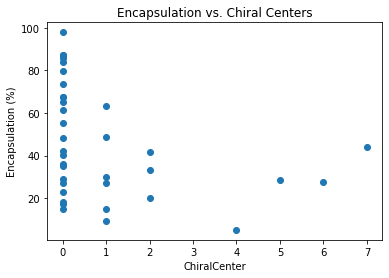

In [13]:
# Plotting encapsulation vs. chiral centers
plt.scatter(IDNP_data2['ChiralCenter'],IDNP_data2['Encapsulation'])
plt.xlabel('ChiralCenter')
plt.ylabel('Encapsulation (%)')
plt.title('Encapsulation vs. Chiral Centers')

## Step 3a - No chiral centers

In [14]:
# Selecting drugs with no chiral centers for next step
IDNP_data3a = IDNP_data2[IDNP_data2['ChiralCenter']==0]
IDNP_data3a.to_csv('Data_files/For_plotting/IDNP_data3a.csv')

In [15]:
# Find best regressor for IDNP formulations (set 3a) to describe encapsulation efficiency
to_ignore = ['Size','Encapsulation']
[best_regressor3a, scores_3a] = find_best_regressor(IDNP_data3a,'Encapsulation',20,to_ignore)
scores_3a.to_csv('Data_files/For_plotting/IDNP_regr_scores_3a.csv')

      Descriptor        r2
0   CATS2D_04_DL  0.602600
1   CATS3D_05_DL  0.552844
2   CATS3D_04_DL  0.548072
3   CATS2D_05_DL  0.539634
4    Eta_D_epsiD  0.538548
5   CATS2D_00_DD  0.530381
6   CATS3D_00_DD  0.530381
7          nHDon  0.521387
8          H-050  0.521387
9   CATS3D_06_DL  0.519583
10   SpDiam_B(v)  0.516977
11   SpDiam_B(e)  0.500303
12   SpDiam_B(i)  0.496757
13  CATS2D_08_DA  0.493205
14            Hy  0.473377
15  CATS2D_06_DL  0.468246
16   P_VSA_ppp_D  0.465292
17         SAdon  0.465292
18       SHED_DA  0.464371
19  CATS3D_07_DL  0.463449


Text(0.5, 1.0, 'Encapsulation vs. nHDon')

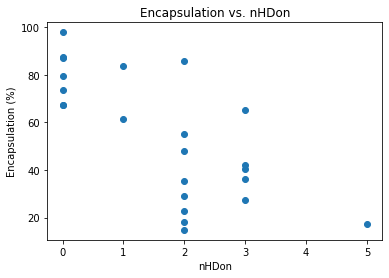

In [16]:
# Plotting encapsulation vs. number of hydrogen bond donors
plt.scatter(IDNP_data3a['nHDon'],IDNP_data3a['Encapsulation'])
plt.xlabel('nHDon')
plt.ylabel('Encapsulation (%)')
plt.title('Encapsulation vs. nHDon')

## Step 3b - With chiral center(s)

In [17]:
# Selecting drugs with chiral center(s) for next step
IDNP_data3b = IDNP_data2[IDNP_data2['ChiralCenter']>0]
IDNP_data3b.to_csv('Data_files/For_Plotting/IDNP_data3b.csv')

In [18]:
# Find best regressor for IDNP formulations (set 3a) to describe encapsulation efficiency
to_ignore = ['Size','Encapsulation']
[best_regressor3b, scores_3b] = find_best_regressor(IDNP_data3b,'Encapsulation',20,to_ignore)
scores_3b.to_csv('Data_files/For_plotting/IDNP_regr_scores_3b.csv')

               Descriptor        r2
0                    JGI7  0.548586
1                    NNRS  0.470149
2   s3_numSharedNeighbors  0.461956
3   s4_numSharedNeighbors  0.440475
4                    JGI5  0.427111
5                  GATS3v  0.424271
6             VE1sign_G/D  0.415665
7                SpPosA_X  0.415112
8                 SpMAD_X  0.412880
9              SpMAD_B(v)  0.408088
10                  AVS_X  0.405337
11                 Mor25s  0.403664
12                Eta_B_A  0.403515
13             SpMAD_B(i)  0.401129
14             SpMAD_B(e)  0.396727
15            VE2sign_G/D  0.396396
16                 GATS8e  0.395977
17               B06[O-F]  0.395066
18               B06[N-F]  0.395066
19               Chi_D/Dt  0.393870


Text(0.5, 1.0, 'Encapsulation vs. JGI7')

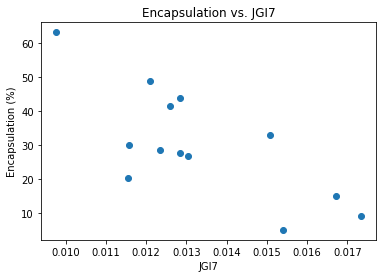

In [19]:
# Plotting encapsulation vs. JGI7
plt.scatter(IDNP_data3b['JGI7'],IDNP_data3b['Encapsulation'])
plt.xlabel('JGI7')
plt.ylabel('Encapsulation (%)')
plt.title('Encapsulation vs. JGI7')

# Classification analysis - Size

In [20]:
# Define a binary threshold for size classification
IDNP_data_size = IDNP_data.copy()
IDNP_data_size['Size_binary'] = IDNP_data_size['Size']<500
IDNP_data_size.to_csv('Data_files/For_plotting/IDNP_data_size.csv')

In [21]:
# Search for best classifier to define if size is greater than or less than 500 nm
to_ignore = ['Size','Encapsulation']
[best_clf_size,desc_list_clf_size,score_list_clf_size] = find_best_classifier(IDNP_data_size,
                                                                              'Size_binary',20,to_ignore)
IDNP_size_clf_scores = pd.DataFrame()
IDNP_size_clf_scores['Descriptor'] = desc_list_clf_size
IDNP_size_clf_scores['Balanced accuracy'] = score_list_clf_size
IDNP_size_clf_scores.to_csv('Data_files/For_plotting/IDNP_size_clf_scores.csv')

       Descriptor  Balanced accuracy
0             J_G           0.769795
1    P_VSA_LogP_6           0.730938
2             L1u           0.717742
3             L1e           0.717742
4           NaasC           0.717742
5             L1i           0.717742
6    SM10_AEA(ri)           0.714809
7    Eig15_EA(ed)           0.714809
8    CATS3D_11_AA           0.711877
9          ZM2Kup           0.708211
10         piPC10           0.708211
11           gmax           0.702346
12   Eig13_EA(bo)           0.701613
13   Eig12_EA(ed)           0.701613
14       Eig14_EA           0.701613
15  Eig12_AEA(ed)           0.701613
16            IC3           0.701613
17        SHED_LL           0.701613
18   SM07_AEA(ri)           0.701613
19   SM08_AEA(dm)           0.701613


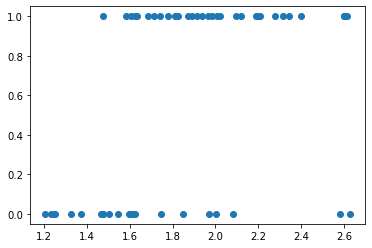

In [22]:
# Plotting binary size vs. J_G
plt.scatter(IDNP_data_size['J_G'],IDNP_data_size['Size_binary'])

# Test compounds

In [23]:
# read file with descriptors
example_drugs = pd.read_csv('Data_files/descriptors_example_cases.csv')
example_drugs[['NAME','ALOGP','ChiralCenter','JGI7','nHDon','J_G']]

,NAME,ALOGP,ChiralCenter,JGI7,nHDon,J_G
0,Emetine analog,13.210,4,0.01211,0,2.367
1,Netarsudil,3.901,1,0.01011,3,1.835
2,Sorafenib analogue,3.938,0,0.00803,4,1.461
